<>:118: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:118: SyntaxWarning: "is" with a literal. Did you mean "=="?


What type of detection woul you like to perform?
1. Face Detection
2. Eye Detection
3. Face and Eye Detection
4. Full Body Detection
5. Car Detection

Enter Your Choice: 1
What type of file you would like to use?
1. Image (.jpg only)
2. Video (.mp4 only)
3. Camera

Enter Your Choice: 1
Enter name of the file (add .jpg after the name): img1.jpg


C:\Users\verma\AppData\Local\Temp/ipykernel_12628/108402577.py:118: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():
C:\Users\verma\AppData\Local\Temp/ipykernel_12628/108402577.py:87: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if faces == ():


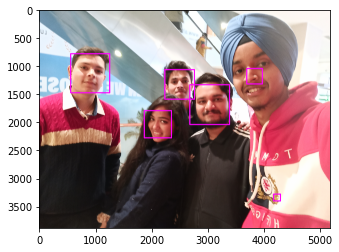

In [1]:
# This project was made while I was studying OpenCV for a project with python.
# This documentation can help you to learn Object Detection with OpenCV and Python.
# This project is capable of detecting faces, eyes and both of them from Images, people
# walking and cars moving from Videos and camera.
# 
# This was taught by 
# Ilias Papachristos, Data Analyst - Scientist.
#
# The raw cascades were originally made by:
#   Eye Cascade: Stump-based 20x20 by Shameem Hameed
#   Face Cascade: Discrete adaboost frontal face detector by Rainer Lienhart
#
# I am contributing this project to the open source because I want to provide value to my peers.
#
# Basically, what the source code does is, first it asks the user to what type of detection 
# would the user like to perform? After that, the user is prompted for the input type i.e. either
# a jpg file, mp4 file or the user's camera. Using the haarcascades, the classifiers are trained
# and coded. Detailed description of Source Code is done below:
# 
# RoadMap of training the model through a jpg file:
#      1. Import Libraries
#      2. Create a classifier
#      3. Open and fix the image
#      4. Detect the object (.detectMultiScale)
#      5. Highlighting Function
# 
# RoadMap of training the model through a mp4 file:
#      1. Import Libraries
#      2. Create a classifier
#      3. Open the video
#      4. While loop (Frame by Frame capture)
# 
# RoadMap of training the model through source camera:
#      1. Import Libraries
#      2. Create a classifier
#      3. Video Capture variable(At t=0)
#      4. Highlighting Function 
#      5. While loop (Frame by Frame capture)
# 
#------------------------------------------Source Code------------------------------------------

#-- Import Libraries
import cv2
import numpy as numpy
import matplotlib.pyplot as plt

#-- Create Classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
body_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_fullbody.xml')
car_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_car.xml')

#-- User Prompts
print("What type of detection woul you like to perform?\n1. Face Detection\n2. Eye Detection\n3. "
      "Face and Eye Detection\n4. Full Body Detection\n5. Car Detection\n") 
type_of_det = int(input("Enter Your Choice: "))

while 0 <= type_of_det >=6:
        print("Incorrect Choice!")
        type_of_det = int(input("Enter Your Choice Again: "))

print("What type of file you would like to use?\n1. Image (.jpg only)\n2. Video"
      " (.mp4 only)\n3. Camera\n")
type_of_file = int(input("Enter Your Choice: "))

while 0 <= type_of_file >= 4:
        print("Incorrect Choice!")
        type_of_file = int(input("Enter Your Choice Again: "))

if type_of_file == 1:
    path = input("Enter name of the file (add .jpg after the name): ")
elif type_of_file == 2:
    path = input("Enter name of the file (add .mp4 after the name): ")
else:
    print("Opening Camera......")

#-- Main Code according to the user inputs:

if type_of_file == 1:
    if type_of_det == 1:
        # Open Image
        image = cv2.imread('Images/' + path)
        fix_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Detect Faces
        faces = face_cascade.detectMultiScale(image, 1.3, 5)
        # No Faces Detected
        if faces == ():
            print("No face is detected!")
        # Main Function
        def detect_face(fix_img):
            face_rects = face_cascade.detectMultiScale(fix_img)
            for (x, y, w, h) in face_rects:
                cv2.rectangle(fix_img, (x, y), (x + w, y + h), (255, 0, 255), 20)
            return fix_img
        # Display Results
        result = detect_face(fix_img)
        plt.imshow(result)
    elif type_of_det == 2:
        # Open Image
        image = cv2.imread('Images/' + path)
        fix_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Main Function
        def detect_eyes(fix_img):
            eye_rects = eye_cascade.detectMultiScale(fix_img)
            for (x, y, w, h) in eye_rects:
                cv2.rectangle(fix_img, (x, y), (x + w, y + h), (25, 125, 225), 5)
            return fix_img
        # Display Results
        result = detect_eyes(fix_img)
        plt.imshow(result)
    elif type_of_det == 3:
    # Open Image
        image = cv2.imread('Images/' + path)
        fix_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Detect Faces
        faces = face_cascade.detectMultiScale(image, 1.5, 4)
        # No Faces Detected
        if faces is ():
            print("No face is detected!")
        # Main Function
        def detect_face_eyes(fix_img):
            face_rects = face_cascade.detectMultiScale(fix_img)
            eye_rects = eye_cascade.detectMultiScale(fix_img)
            for (x, y, w, h) in face_rects:
                cv2.rectangle(fix_img, (x, y), (x + w, y + h), (255, 0, 255), 7)
            for (ix, iy, iw, ih) in face_rects:
                cv2.rectangle(fix_img, (ix, iy), (ix + iw, iy + ih), (255, 0, 0), 5)
            return fix_img
        # Display Results
        result = detect_face_eyes(fix_img)
        plt.imshow(result)
    elif type_of_det == 4:
    # Open Image
        image = cv2.imread('Images/' + path)
        fix_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Main Function
        def detect_body(fix_img):
            body_rects = body_cascade.detectMultiScale(fix_img)
            for (x, y, w, h) in body_rects:
                cv2.rectangle(fix_img, (x, y), (x + w, y + h), (25, 125, 225), 5)
            return fix_img
        # Display Results
        result = detect_body(fix_img)
        plt.imshow(result)
    elif type_of_det == 5:
        # Open Image
        image = cv2.imread('Images/' + path)
        fix_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        car_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_car.xml')
        # Main Function
        def detect_car(fix_img):
            car_rects = car_cascade.detectMultiScale(image, 1.4, 2)
            for (x, y, w, h) in car_rects:
                cv2.rectangle(frame, (x, y), (x + w, y + h), (25, 125, 225), 5)
            return fix_img
        # Display Results
        result = detect_car(fix_img)
        plt.imshow(result)
elif type_of_file == 2:
    if type_of_det == 1:
        # Open Video
        video = cv2.VideoCapture('Video/' + path)
        # While Loop
        while video.isOpened():
            # Read the capture
            ret, frame = video.read()
            # Pass the Frame to the Classifier
            frame_fix = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frame_fix = cv2.equalizeHist(frame_fix)
            faces = face_cascade.detectMultiScale(frame_fix)
            # if Statement
            if ret == True:
                # Bound Boxes to Identified Bodies
                for (x, y, w, h) in faces:
                    center = (x + w//2, y + h//2)
                    cv2.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 7)
                    cv2.imshow('Video Playing', frame)
                # Exit with Esc button
                if cv2.waitKey(1) == 27:
                    break
            # else Statement
            else:
                break
        # Release the Capture & Destroy All Windows
        video.release()
        cv2.destroyAllWindows()
    elif type_of_det == 2:
        # Open Video
        video = cv2.VideoCapture('Video/' + path)
        # While Loop
        while video.isOpened():
            # Read the capture
            ret, frame = video.read()
            # Pass the Frame to the Classifier
            frame_fix = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frame_fix = cv2.equalizeHist(frame_fix)
            faces = face_cascade.detectMultiScale(frame_fix)
            # if Statement
            if ret == True:
                # Bound Boxes to Identified Bodies
                for (x, y, w, h) in faces:
                    center = (x + w//2, y + h//2)
                    frame = cv2.ellipse(frame, center, (w//2, h//2), 0, 0, 360, 7)
                    faceROI = frame_fix[y:y+h,x:x+w]
                    eyes = eye_cascade.detectMultiScale(faceROI)
                    for (x2,y2,w2,h2) in eyes:
                        eye_center = (x + x2 + w2//2, y + y2 + h2//2)
                        radius = int(round((w2 + h2)*0.25))
                        frame = cv2.circle(frame, eye_center, radius, (255, 0, 0 ), 5)
                    cv2.imshow('Video Playing', frame)
                # Exit with Esc button
                if cv2.waitKey(1) == 27:
                    break
            # else Statement
            else:
                break
        # Release the Capture & Destroy All Windows
        video.release()
        cv2.destroyAllWindows()
    elif type_of_det == 3:
    # Open Video
        video = cv2.VideoCapture('Video/' + path)
        # While Loop
        while video.isOpened():
            # Read the capture
            ret, frame = video.read()
            # Pass the Frame to the Classifier
            frame_fix = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frame_fix = cv2.equalizeHist(frame_fix)
            faces = face_cascade.detectMultiScale(frame_fix)
            # if Statement
            if ret == True:
                # Bound Boxes to Identified Bodies
                for (x, y, w, h) in faces:
                    center = (x + w//2, y + h//2)
                    frame = cv2.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 7)
                    faceROI = frame_fix[y:y+h,x:x+w]
                    eyes = eye_cascade.detectMultiScale(faceROI)
                    for (x2,y2,w2,h2) in eyes:
                        eye_center = (x + x2 + w2//2, y + y2 + h2//2)
                        radius = int(round((w2 + h2)*0.25))
                        frame = cv2.circle(frame, eye_center, radius, (255, 0, 0 ), 5)
                    cv2.imshow('Video Playing', frame)
                # Exit with Esc button
                if cv2.waitKey(1) == 27:
                    break
            # else Statement
            else:
                break
        # Release the Capture & Destroy All Windows
        video.release()
        cv2.destroyAllWindows()
    elif type_of_det == 4:
        # Open Video
        video = cv2.VideoCapture('Video/' + path)
        # While Loop
        while video.isOpened():
            # Read the capture
            ret, frame = video.read()
            # Pass the Frame to the Classifier
            bodies = body_cascade.detectMultiScale(frame, 1.2, 3)
            # if Statement
            if ret == True:
                # Bound Boxes to Identified Bodies
                for (x, y, w, h) in bodies:
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (25, 125, 225), 5)
                    cv2.imshow('Video Playing', frame)
                # Exit with Esc button
                if cv2.waitKey(1) == 27:
                    break
            # else Statement
            else:
                break
        # Release the Capture & Destroy All Windows
        video.release()
        cv2.destroyAllWindows()
    else:
        # Open Video
        video = cv2.VideoCapture('Video/' + path)
        # While Loop
        while video.isOpened():
            # Read the capture
            ret, frame = video.read()
            # Pass the Frame to the Classifier
            cars = car_cascade.detectMultiScale(frame, 1.4, 2)
            # if Statement
            if ret == True:
                # Bound Boxes to Identified Cars
                for (x, y, w, h) in cars:
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (25, 125, 225), 5)
                    cv2.imshow('Video Playing', frame)
                # Exit with Esc button
                if cv2.waitKey(1) == 27:
                    break
            # else Statement
            else:
                break
        # Release the Capture & Destroy All Windows
        video.release()
        cv2.destroyAllWindows()
else:
    if type_of_det == 1:
        capture = cv2.VideoCapture(0)
        def detectAndDisplay(frame):
            frame_fix = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frame_fix = cv2.equalizeHist(frame_fix)
            #-- Detect faces
            faces = face_cascade.detectMultiScale(frame_fix)
            for (x,y,w,h) in faces:
                center = (x + w//2, y + h//2)
                frame = cv2.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 7)
            cv2.imshow('Camera Playing', frame)
        while(True):
            # Capture frame-by-frame
            ret, frame = capture.read()
            # Our operations on the frame come here
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # Display the resulting frame
            detectAndDisplay(frame)
            if cv2.waitKey(10) == 27:
                break
        # When everything is done, release the capture
        capture.release()
        cv2.destroyAllWindows()
    elif type_of_det == 2:
        capture = cv2.VideoCapture(0)
        def detectAndDisplay(frame):
            frame_fix = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frame_fix = cv2.equalizeHist(frame_fix)
            #-- Detect faces
            faces = face_cascade.detectMultiScale(frame_fix)
            for (x,y,w,h) in faces:
                center = (x + w//2, y + h//2)
                frame = cv2.ellipse(frame, center, (w//2, h//2), 0, 0, 360, 0, 0)
                faceROI = frame_fix[y:y+h,x:x+w]
                #-- In each face, detect eyes
                eyes = eye_cascade.detectMultiScale(faceROI)
                for (x2,y2,w2,h2) in eyes:
                    eye_center = (x + x2 + w2//2, y + y2 + h2//2)
                    radius = int(round((w2 + h2)*0.25))
                    frame = cv2.circle(frame, eye_center, radius, (255, 0, 0 ), 5)
            cv2.imshow('Camera Playing', frame)
        while(True):
            # Capture frame-by-frame
            ret, frame = capture.read()
            # Our operations on the frame come here
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # Display the resulting frame
            detectAndDisplay(frame)
            if cv2.waitKey(10) == 27:
                break
        # When everything is done, release the capture
        capture.release()
        cv2.destroyAllWindows()
    elif type_of_det == 3:
        capture = cv2.VideoCapture(0)
        def detectAndDisplay(frame):
            frame_fix = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frame_fix = cv2.equalizeHist(frame_fix)
            #-- Detect faces
            faces = face_cascade.detectMultiScale(frame_fix)
            for (x,y,w,h) in faces:
                center = (x + w//2, y + h//2)
                frame = cv2.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 7)
                faceROI = frame_fix[y:y+h,x:x+w]
                #-- In each face, detect eyes
                eyes = eye_cascade.detectMultiScale(faceROI)
                for (x2,y2,w2,h2) in eyes:
                    eye_center = (x + x2 + w2//2, y + y2 + h2//2)
                    radius = int(round((w2 + h2)*0.25))
                    frame = cv2.circle(frame, eye_center, radius, (255, 0, 0 ), 5)
            cv2.imshow('Camera Playing', frame)
        while(True):
            # Capture frame-by-frame
            ret, frame = capture.read()
            # Our operations on the frame come here
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # Display the resulting frame
            detectAndDisplay(frame)
            if cv2.waitKey(10) == 27:
                break
        # When everything is done, release the capture
        capture.release()
        cv2.destroyAllWindows()
    elif type_of_det == 4:
        capture = cv2.VideoCapture(0)
        def detectAndDisplay(frame):
            frame_fix = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frame_fix = cv2.equalizeHist(frame_fix)
            #-- Detect bodies
            bodies = body_cascade.detectMultiScale(frame_fix)
            for (x,y,w,h) in bodies:
                frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 255), 7)
            cv2.imshow('Camera Playing', frame)
        while(True):
            # Capture frame-by-frame
            ret, frame = capture.read()
            # Our operations on the frame come here
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # Display the resulting frame
            detectAndDisplay(frame)
            if cv2.waitKey(10) == 27:
                break
        # When everything is done, release the capture
        capture.release()
        cv2.destroyAllWindows()
    else:
        capture = cv2.VideoCapture(0)
        def detectAndDisplay(frame):
            frame_fix = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frame_fix = cv2.equalizeHist(frame_fix)
            #-- Detect cars
            cars = car_cascade.detectMultiScale(frame_fix, 1.4, 2)
            for (x,y,w,h) in cars:
                frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (25, 125, 225), 5)
            cv2.imshow('Camera Playing', frame)
        while(True):
            # Capture frame-by-frame
            ret, frame = capture.read()
            # Our operations on the frame come here
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # Display the resulting frame
            detectAndDisplay(frame)
            if cv2.waitKey(10) == 27:
                break
        # When everything is done, release the capture
        capture.release()
        cv2.destroyAllWindows()